In [1]:
"""Show the results of the optimization on the VLSE benchmark."""

# Copyright (C) 2024 National Renewable Energy Laboratory

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.2.0"
__deprecated__ = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from test_vlse_bench import *


# myRfuncs = ("branin", "hart3", "hart6", "shekel", "ackley", "levy", "powell", "michal", "spheref", "rastr")
# algorithms = ("SRS","DYCORS")

myRfuncs = ("branin","hart3","hart6","shekel","ackley","levy", "powell", "michal", "spheref", "rastr")
algorithms = ("SRS","DYCORS","CPTVl")

# myRfuncs = ("branin","hart3","hart6","shekel")
# algorithms = ("SRS","DYCORS","MLSL","CPTVl")

myNargs = {}
maxEvals = {}
nTrials = 0
rtol = 0
optres = {}
exectime = {}


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [3]:
for a in algorithms:
    optres[a] = {}
    exectime[a] = {}
    for rFunc in myRfuncs:
        myNargs[rFunc] = 0
        maxEvals[rFunc] = 0
        optres[a][rFunc] = []
        exectime[a][rFunc] = 0.0
        with open("pickle/vlse_bench_plot_" + rFunc + "_" + a + ".pkl", "rb") as f:
            myNargs[rFunc], maxEvals[rFunc], nTrials, optres[a][rFunc], exectime[a][rFunc] = pickle.load(f)

In [4]:
# func = "shekel"
# print([optres["CPTVl"][func][i].x for i in range(nTrials)])
# print([optres["CPTVl"][func][i].fx for i in range(nTrials)])

# print([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)])
# print(np.array([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)]))

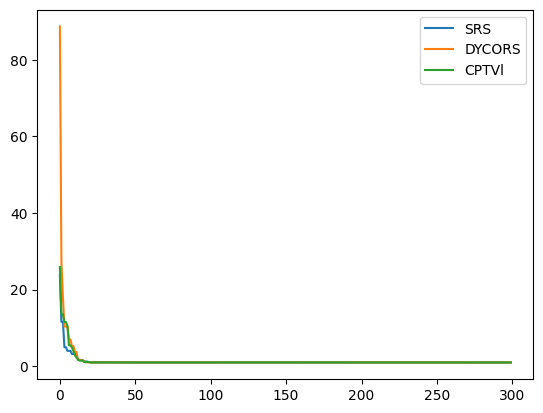

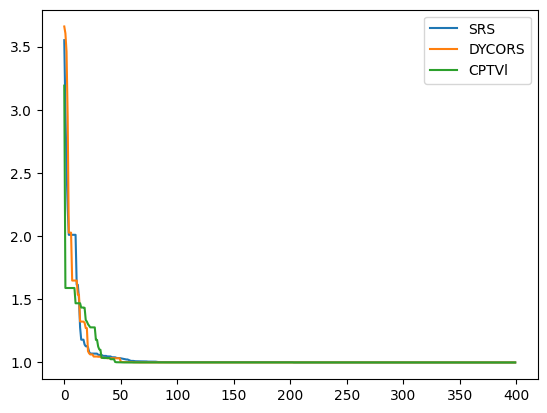

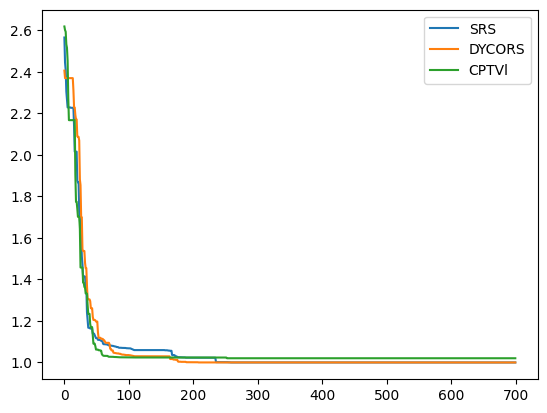

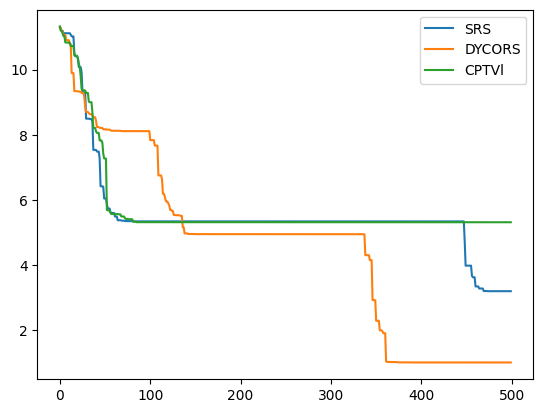

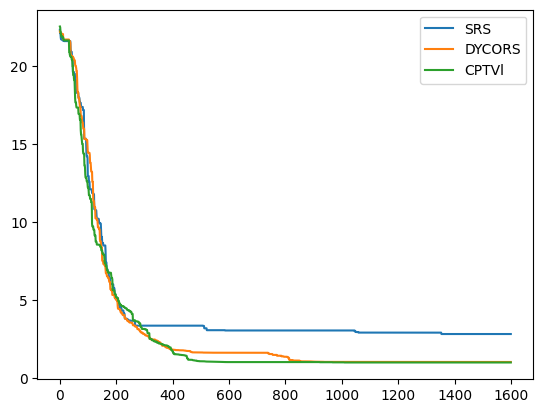

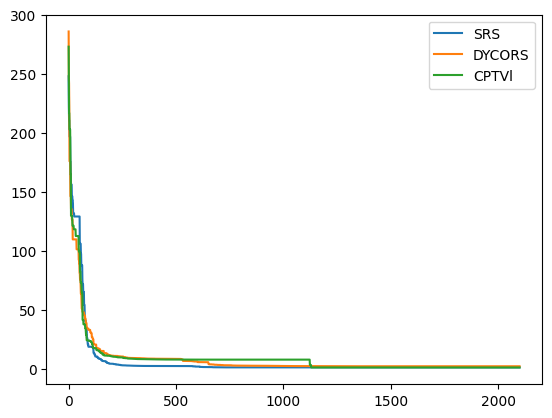

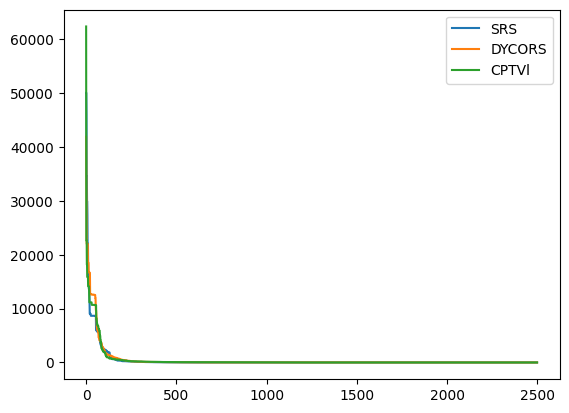

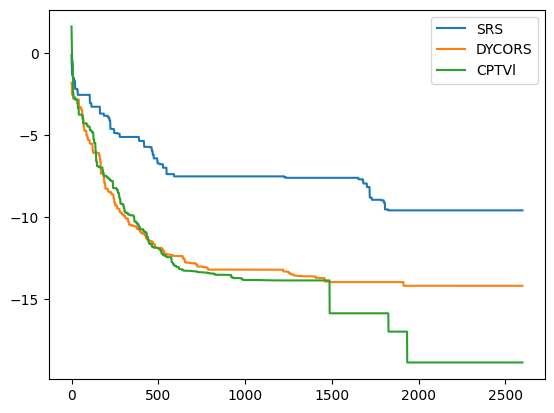

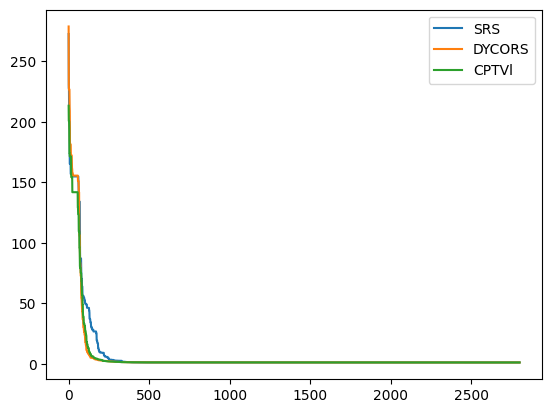

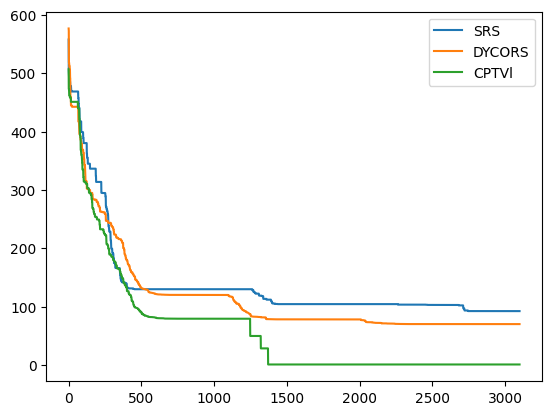

In [5]:
avgBestVals = {}
for a in algorithms:
    avgBestVals[a] = {}
    for rFunc in myRfuncs:
        avgBestVals[a][rFunc] = np.mean(np.array([np.minimum.accumulate(optres[a][rFunc][i].fsamples).tolist() for i in range(nTrials)]), axis=0)

for rFunc in myRfuncs:
    for a in algorithms:
        plt.plot(avgBestVals[a][rFunc], label=a)
    plt.legend()
    plt.show()

In [6]:
rtau = 1e-2
atau = 1e-3
minVal = 1.0

lpa = {}
for a in algorithms:
    lpa[a] = {}
    for rFunc in myRfuncs:
        count = 0
        while count < len(avgBestVals[a][rFunc]):
            if avgBestVals[a][rFunc][count] - minVal <= rtau * abs(minVal):
                break
            else:
                count += 1
        lpa[a][rFunc] = count+1

maxKappa = 100
delta = {}
for a in algorithms:
    delta[a] = np.zeros(maxKappa+1)
    for k in range(1,maxKappa+1):
        count = 0
        for rFunc in myRfuncs:
            if lpa[a][rFunc]/(myNargs[rFunc]+1) <= k:
                count += 1
        delta[a][k] = count / len(myRfuncs)

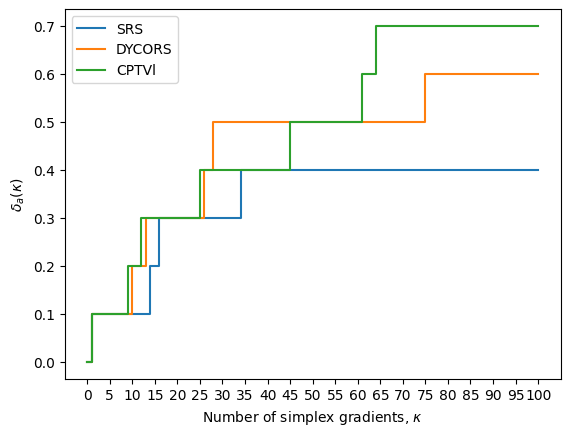

In [7]:
for a in algorithms:
    plt.step(np.arange(0,maxKappa+1), delta[a], where='post', label=a)
plt.xlabel(r'Number of simplex gradients, $\kappa$')
plt.xticks(range(0,101,5))
plt.ylabel(r'$\delta_a(\kappa)$')
plt.legend()
plt.show()

In [8]:
# avgBestVals["SRS"]["ackley"]
lpa["SRS"]["ackley"]/(myNargs["ackley"]+1)

100.0625